In [2]:
import os
import json
import pandas as pd
import seaborn as sns
from plotly.offline import iplot
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd

plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px

In [6]:
!pip install openpyxl


In [5]:
# Mount your Google Drive

# Mounting your Google Drive will enable you to access files from Drive in Google Colab e.g. datasets, notebooks, etc.

from google.colab import drive

# This will prompt for authorization. Enter your authorization code and rerun the cell

drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/unemp_comb rates.xlsx')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          38 non-null     datetime64[ns]
 1   un_rate       38 non-null     float64       
 2   un_men rate   38 non-null     float64       
 3   u_women rate  38 non-null     float64       
 4   urate_16-17   38 non-null     float64       
 5   urate_18-24   38 non-null     float64       
 6   urate_25-49   38 non-null     float64       
 7   urate_abv50   38 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 2.5 KB


In [12]:
df.head()

,date,un_rate,un_men rate,u_women rate,urate_16-17,urate_18-24,urate_25-49,urate_abv50
0,2019-01-01,3.930562,4.0,3.814125,22.171954,10.363235,2.876018,2.731411
1,2019-02-01,3.941531,4.1,3.815355,21.003489,10.281047,2.956849,2.692000
2,2019-03-01,3.817801,3.9,3.727483,19.197068,9.924567,2.879300,2.659626
3,2019-04-01,3.830274,4.0,3.650409,20.317636,10.196254,2.863850,2.599570
4,2019-05-01,3.795611,4.0,3.613024,19.556493,10.667547,2.759981,2.550958


In [11]:
df["date"]=pd.to_datetime(df["date"])


In [6]:
#checking null values
df.isna().sum()


date            0
un_rate         0
un_men rate     0
u_women rate    0
urate_16-17     0
urate_18-24     0
urate_25-49     0
urate_abv50     0
dtype: int64

In [8]:
df.describe().round(2)

,un_rate,un_men rate,u_women rate,urate_16-17,urate_18-24,urate_25-49,urate_abv50
count,38.00,38.00,38.00,38.00,38.00,38.00,38.00
mean,4.27,4.45,4.06,24.39,11.25,3.18,3.02
std,0.48,0.51,0.45,4.29,1.30,0.39,0.48
min,3.76,3.90,3.53,19.20,9.71,2.72,2.47
25%,3.87,4.03,3.66,21.10,10.22,2.87,2.60
50%,4.07,4.20,3.92,23.39,10.81,3.03,2.79
75%,4.69,4.90,4.43,25.88,11.95,3.54,3.41
max,5.22,5.40,5.00,35.48,13.85,3.95,3.92


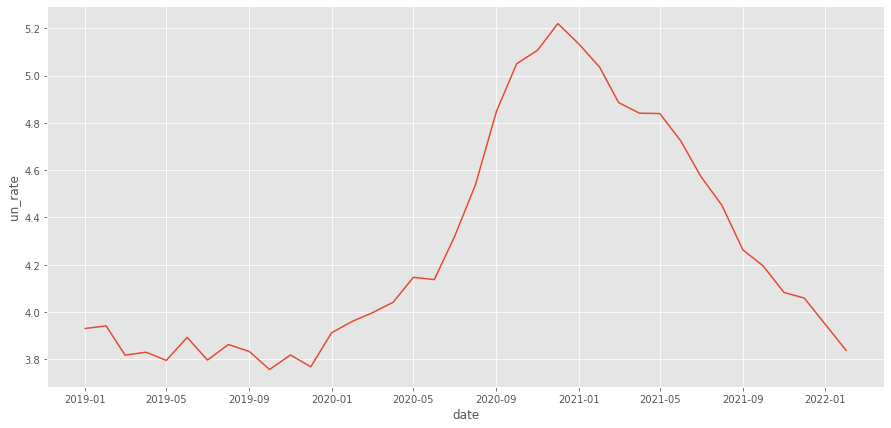

In [14]:
# show the relation years to general Unrated
plt.figure(figsize=(15,7))
sns.lineplot(data=df , x="date",y="un_rate")

In [16]:
#histogram of unemployement rates
hplot = df.filter(['un_rate'])

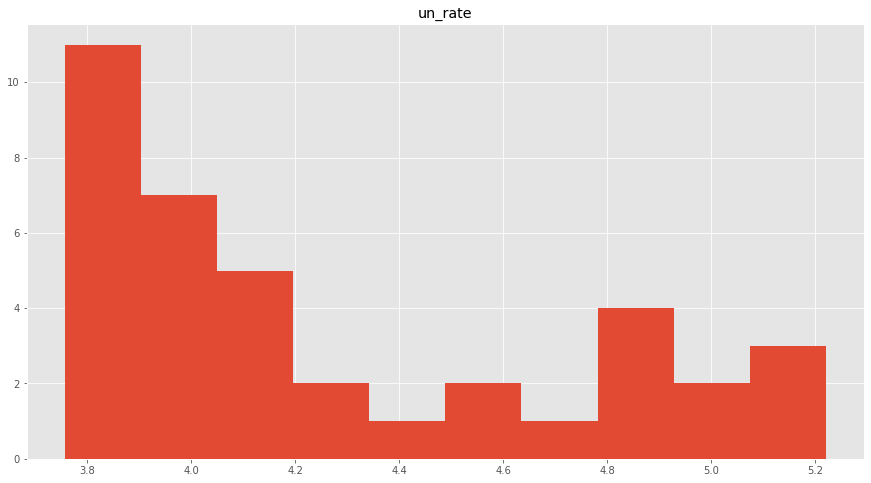

In [19]:
p2 = hplot.hist(figsize = (15,8)) 




No handles with labels found to put in legend.


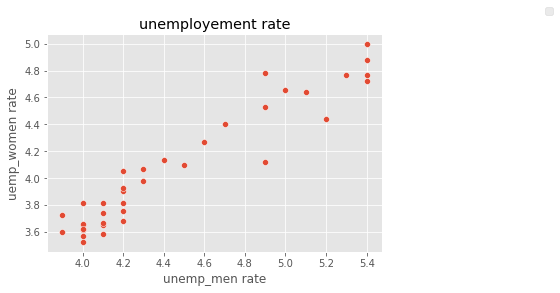

In [10]:
#px.scatter_3d(df,x='date',y="un_men rate",z="u_women rate ",color="u_women rate ")

x = sns.scatterplot(x='un_men rate', y='u_women rate', data=df)
plt.legend(loc="upper center", bbox_to_anchor=(1.5, 1.15), ncol=2)

x.set_title('unemployement rate');
x.set_xlabel('unemp_men rate');
x.set_ylabel('uemp_women rate');


<function matplotlib.pyplot.legend>

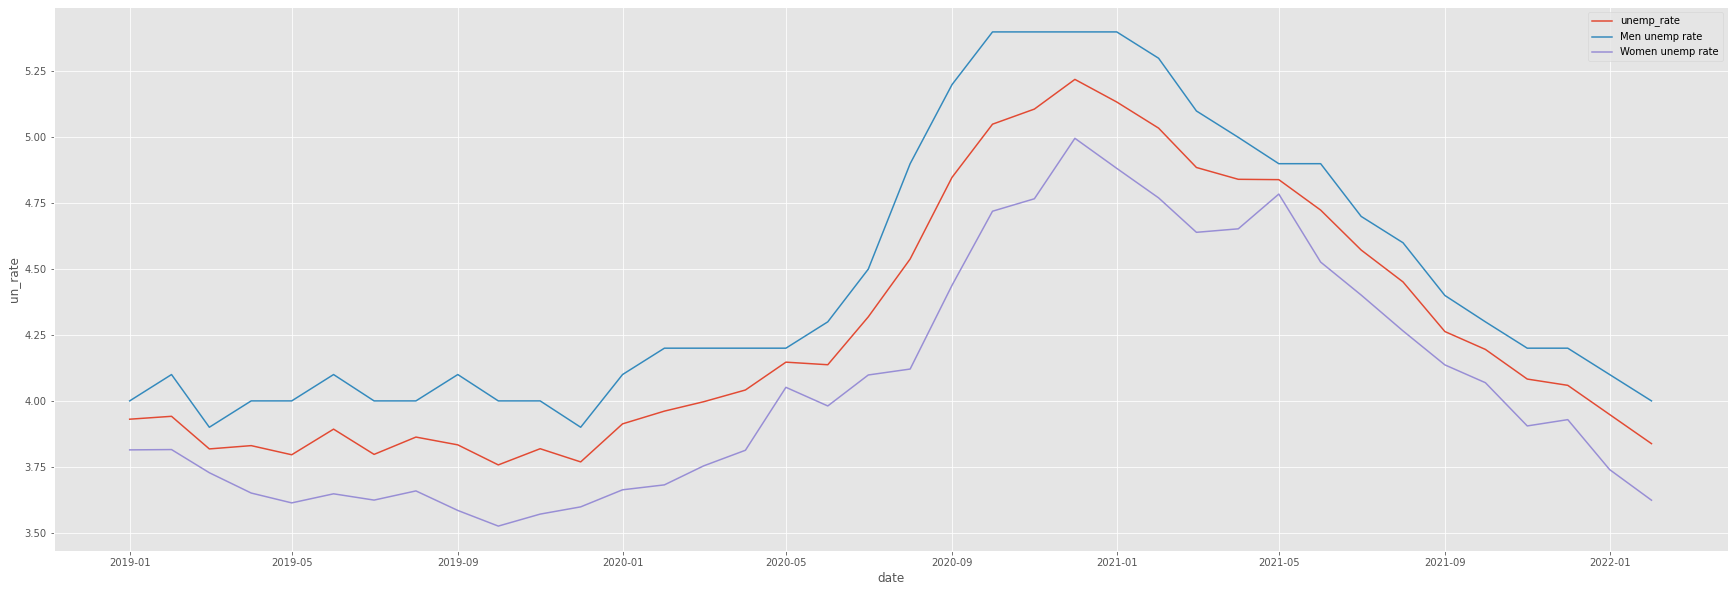

In [12]:
#  show the relation years to Unrated men and women also general Unrated
 
plt.figure(figsize=(30,10))
sns.lineplot(data=df,x="date",y="un_rate",label="unemp_rate")
sns.lineplot(data=df,x="date",y="un_men rate",label="Men unemp rate")
sns.lineplot(data=df,x="date",y="u_women rate",label="Women unemp rate")


plt.legend


<function matplotlib.pyplot.legend>

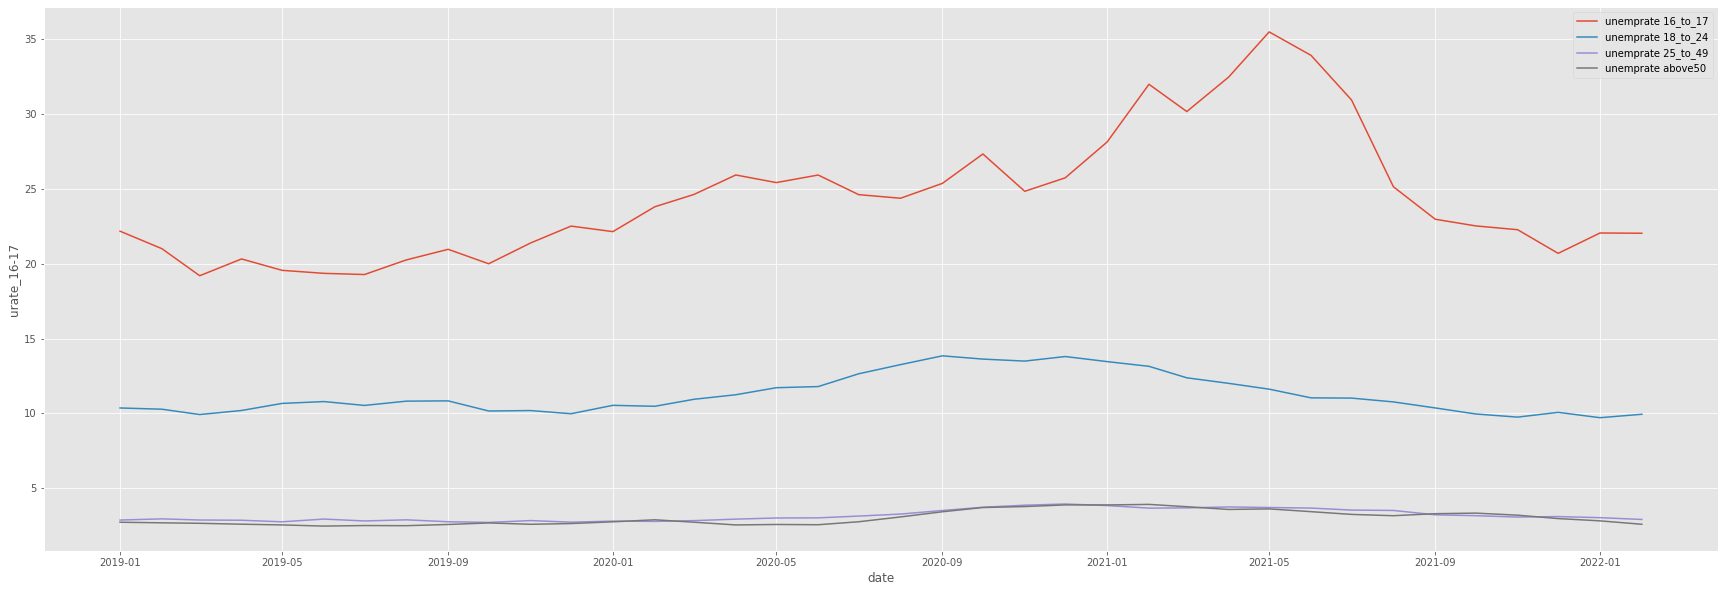

In [18]:
# show the Unemployment category
plt.figure(figsize=(30,10))

sns.lineplot(data=df,x="date",y="urate_16-17",label="unemprate 16_to_17")
sns.lineplot(data=df,x="date",y="urate_18-24",label="unemprate 18_to_24")
sns.lineplot(data=df,x="date",y='urate_25-49 ',label="unemprate 25_to_49")
sns.lineplot(data=df,x="date",y='urate_abv50 ',label="unemprate above50")




plt.legend

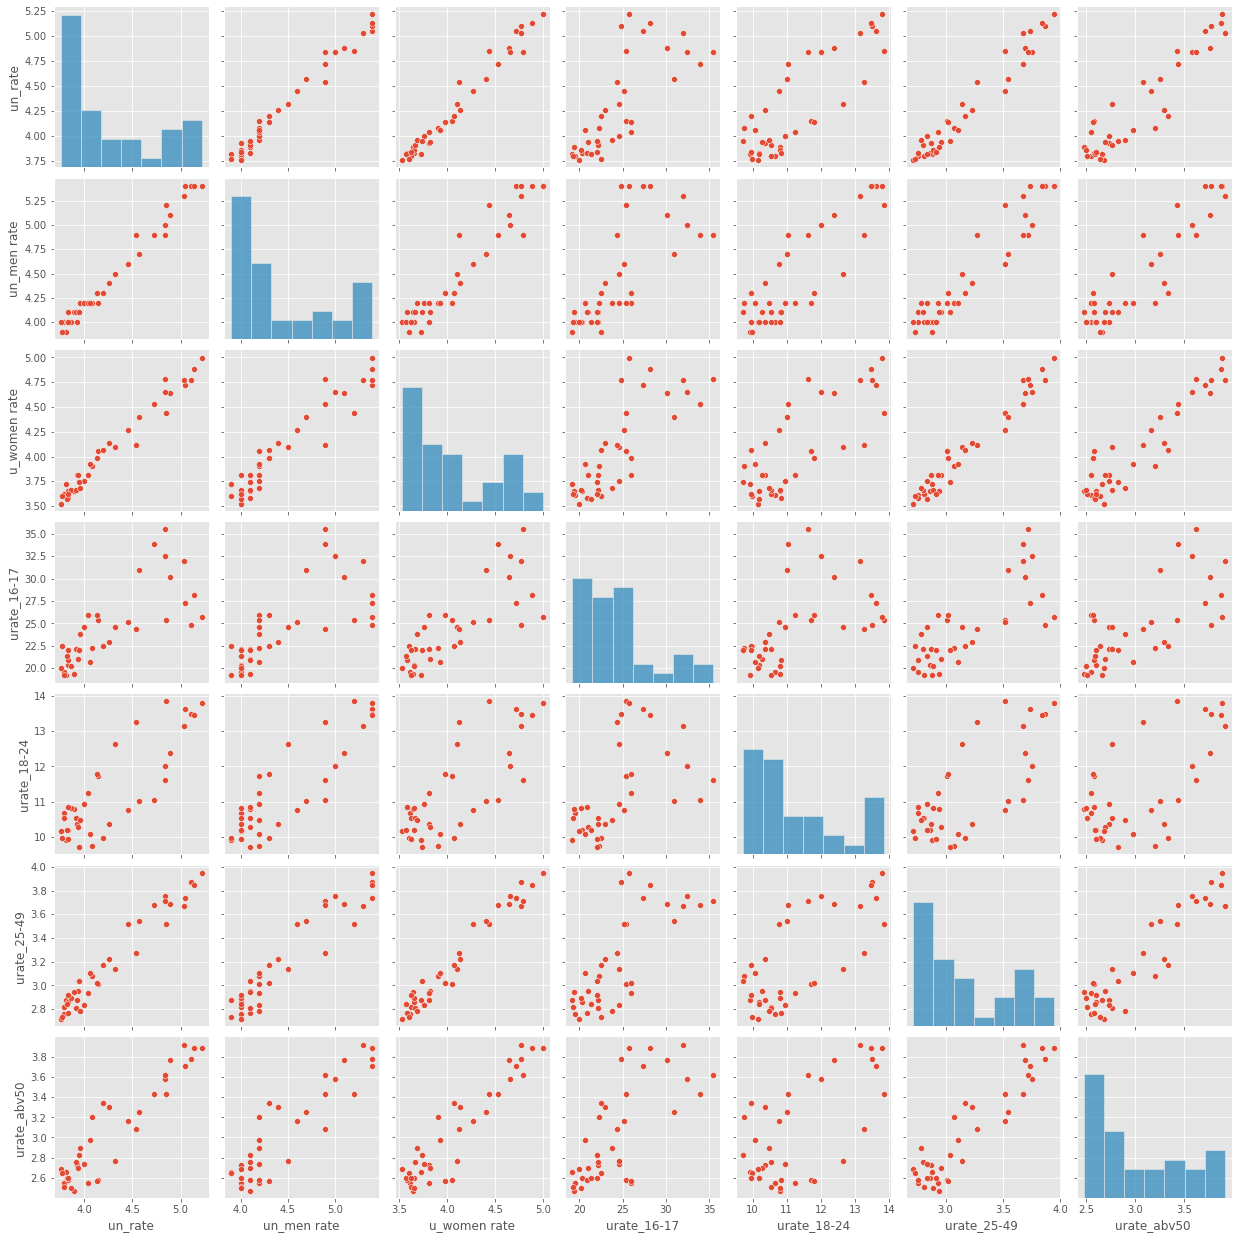

In [57]:
sns.pairplot(df)



In [62]:
#add new column Year for makeing group by 
df['Year']= df['date'].dt.year
avg_year=df.groupby("Year")["un_rate","un_men rate","u_women rate"].mean().round(2)
avg_year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,un_rate,un_men rate,u_women rate
Year,,,
2019,3.84,4.01,3.65
2020,4.44,4.67,4.17
2021,4.59,4.75,4.41
2022,3.89,4.05,3.68


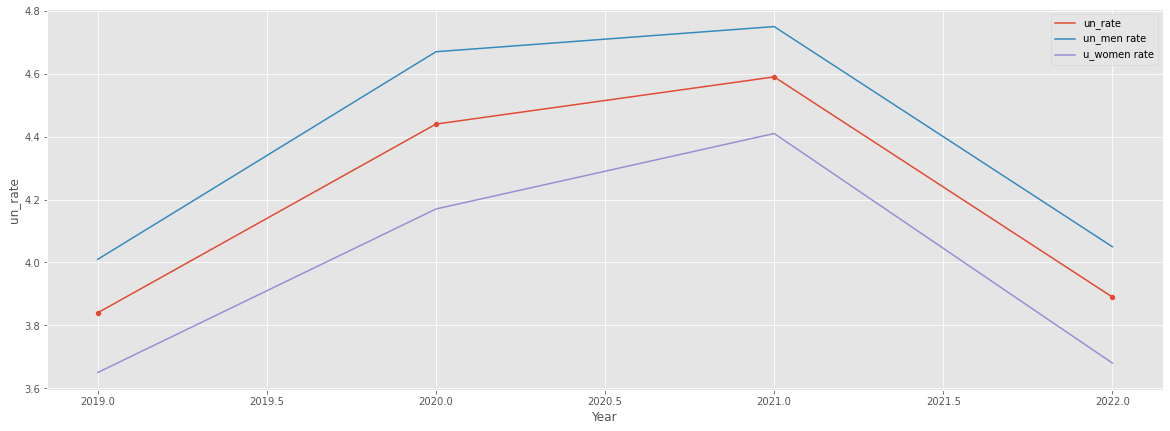

In [67]:
avg_year.plot(figsize=(20,7))
x = sns.scatterplot(x='Year', y='un_rate', data=avg_year)

In [68]:
avg_cat=df.groupby("Year")["urate_16-17","urate_18-24","urate_25-49 ","urate_abv50 "].mean().round(2)
avg_cat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,urate_16-17,urate_18-24,urate_25-49,urate_abv50
Year,,,,
2019,20.50,10.40,2.84,2.60
2020,25.01,12.28,3.24,3.06
2021,28.06,11.30,3.50,3.46
2022,22.04,9.83,2.98,2.71


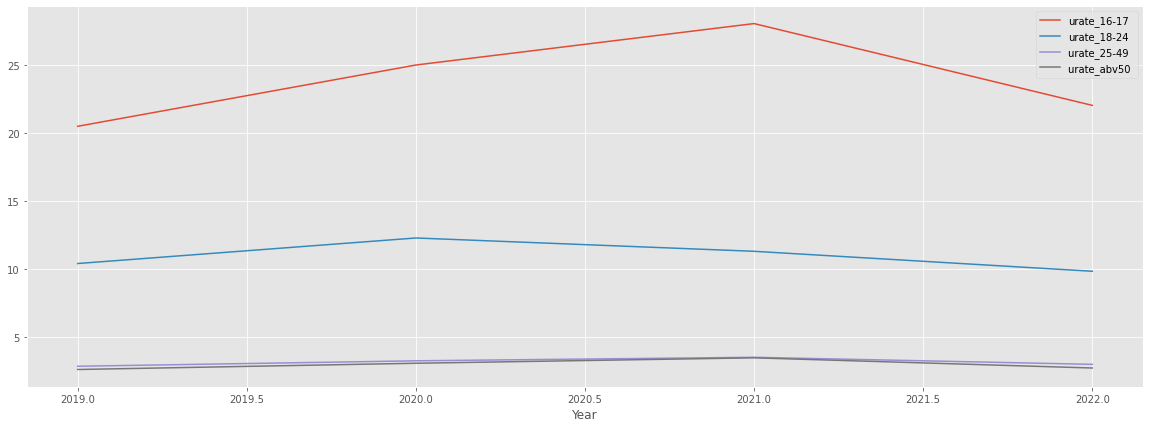

In [69]:
# Visualizations group by
avg_cat.plot(figsize=(20,7))

In [122]:
df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/table_time.xlsx')

In [124]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        304 non-null    datetime64[ns]
 1   Gender                      304 non-null    object        
 2   age                         304 non-null    object        
 3   Up to 6 months              304 non-null    float64       
 4   Over 6 and up to 12 months  304 non-null    float64       
 5   over 12 months              304 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 14.4+ KB


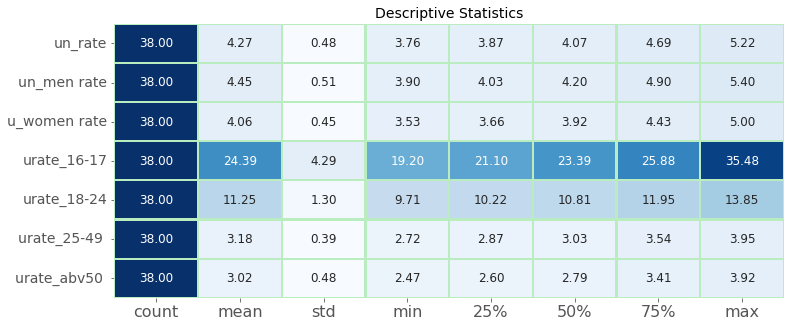

In [73]:
def desc_stats(dataframe):
    desc = dataframe.describe().T
    desc_df = pd.DataFrame(index = dataframe.columns, 
                           columns = desc.columns,
                           data = desc)
    
    f,ax = plt.subplots(figsize=(12,
                                 desc_df.shape[0] * 0.72))
    sns.heatmap(desc_df,
                annot = True,
                cmap = 'Blues',
                fmt = '.2f',
                ax = ax,
                linecolor = '#B9ECBE',
                linewidths = 1.2,
                cbar = False,
                annot_kws = {"size": 12})
    
    plt.xticks(size = 16)
    plt.yticks(size = 14,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(df1[['un_rate','un_men rate','u_women rate',"urate_16-17","urate_18-24","urate_25-49 ","urate_abv50 "]])

In [132]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        304 non-null    datetime64[ns]
 1   Gender                      304 non-null    object        
 2   age                         304 non-null    object        
 3   Up to 6 months              304 non-null    float64       
 4   Over 6 and up to 12 months  304 non-null    float64       
 5   over 12 months              304 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 14.4+ KB


In [108]:
colors = {'Mediterranean': '#1f77b4',
          'Southeastern Anatolia': '#ff7f0e',
          'Aegean': '#2ca02c',
          'Eastern Anatolia': '#d62728',
          'Central Anatolia': '#9467bd',
          'Blacksea': '#8c564b',
          'Marmara': '#e377c2'}

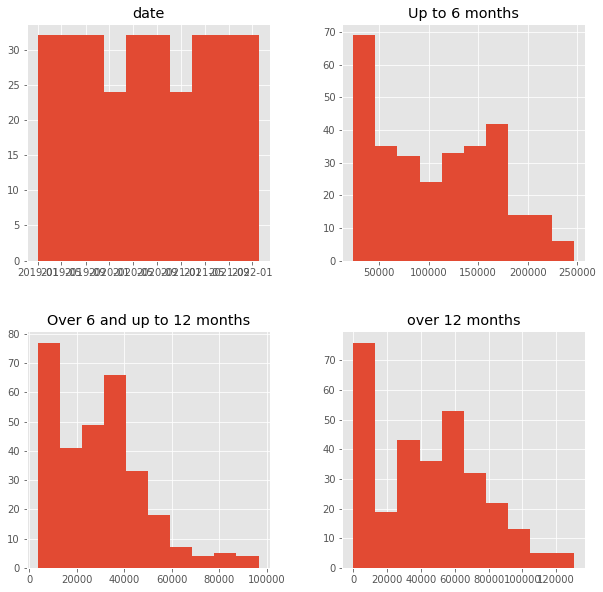

In [165]:
p = df2.hist(figsize = (10,10)) 



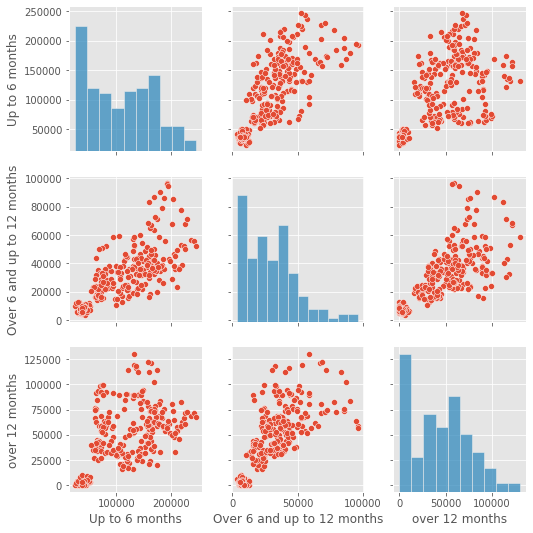

In [125]:
sns.pairplot(df2)

Text(0.5, 1.0, 'Change in LifeExp')

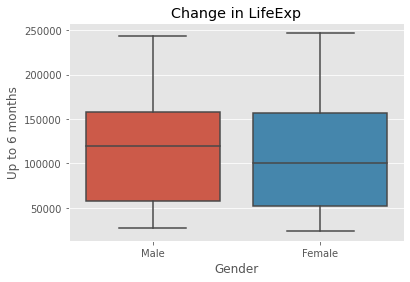

In [131]:
bp = sns.boxplot(x='Gender', y='Up to 6 months', data=df2)
bp.set_title('Upto 6 months vs gender')

Text(0.5, 1.0, ' 6-12 months vs gender')

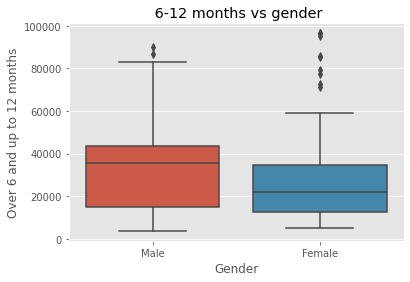

In [133]:
bp = sns.boxplot(x='Gender', y='Over 6 and up to 12 months', data=df2)
bp.set_title(' 6-12 months vs gender')

Text(0.5, 1.0, 'over 12 months vs gender')

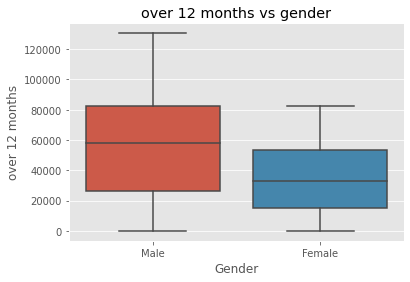

In [134]:
bp = sns.boxplot(x='Gender', y='over 12 months', data=df2)
bp.set_title('over 12 months vs gender')

In [209]:
#df3 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/book11a.xlsx')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            304 non-null    datetime64[ns]
 1   Gender          304 non-null    object        
 2   age             304 non-null    object        
 3   Up to 6 months  304 non-null    float64       
 4   6_12 months     304 non-null    float64       
 5   over12 months   304 non-null    float64       
 6   total           304 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 16.8+ KB


In [208]:
df3. rename(columns = {'Dataset identifier code':'date'}, inplace = True)

In [210]:
df3['Year']= df3['date'].dt.year
df3.head()

,date,Gender,age,Up to 6 months,6_12 months,over12 months,total,Year
0,2019-01-01,Male,16-17,36674.764965,6448.619010,4564.544699,47687.928673,2019
1,2019-02-01,Male,16-17,37845.491578,6815.468183,5720.440428,50381.400189,2019
2,2019-03-01,Male,16-17,35747.429143,4490.597559,4899.736171,45137.762873,2019
3,2019-04-01,Male,16-17,36058.545132,4441.973349,4910.244450,45410.762931,2019
4,2019-05-01,Male,16-17,37910.981810,4281.571508,4381.076295,46573.629612,2019


In [179]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        304 non-null    datetime64[ns]
 1   Gender                      304 non-null    object        
 2   age                         304 non-null    object        
 3   Up to 6 months              304 non-null    float64       
 4   Over 6 and up to 12 months  304 non-null    float64       
 5   over 12 months              304 non-null    float64       
 6   Year                        304 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 16.8+ KB


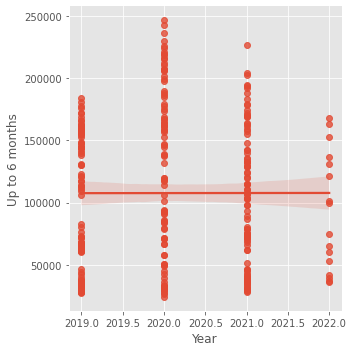

In [180]:
sns.lmplot(x="Year", y="Up to 6 months", data=df2);

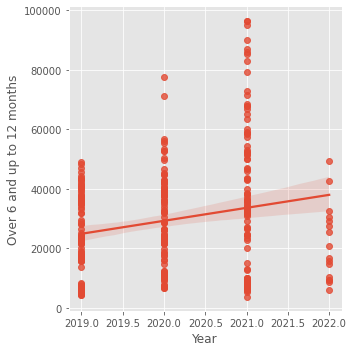

In [181]:
sns.lmplot(x="Year", y="Over 6 and up to 12 months", data=df2);

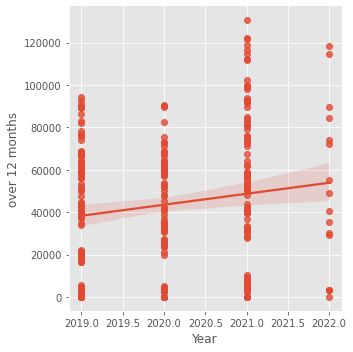

In [182]:
sns.lmplot(x="Year", y="over 12 months", data=df2);

P & TVALUEEEE

In [218]:
df3.head()

,date,Gender,age,Up to 6 months,6_12 months,over12 months,total,Year
0,2019-01-01,Male,16-17,36674.764965,6448.619010,4564.544699,47687.928673,2019
1,2019-02-01,Male,16-17,37845.491578,6815.468183,5720.440428,50381.400189,2019
2,2019-03-01,Male,16-17,35747.429143,4490.597559,4899.736171,45137.762873,2019
3,2019-04-01,Male,16-17,36058.545132,4441.973349,4910.244450,45410.762931,2019
4,2019-05-01,Male,16-17,37910.981810,4281.571508,4381.076295,46573.629612,2019


In [214]:
male_mean = df3[df3['Gender'] == 'Male'].total.mean()


In [199]:
male_mean

54566.30603605734

In [217]:

female_mean = df3[df3['Gender'] == 'Female'].total.mean()
print ("Male unemployeed mean: " + str(male_mean))
print ("female unemployeed mean: " + str(female_mean))

print ("The mean difference between male and female unemployeed rate: " + str(male_mean - female_mean))

Male unemployeed mean: 198964.89738784227
female unemployeed mean: 163698.9181081719
The mean difference between male and female unemployeed rate: 35265.97927967037


In [231]:

order = pd.DataFrame(df3.groupby('age')['total'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['age'])

order.head()

,age,total
0,25-49,2.293414e+07
1,18-24,1.611492e+07
2,50+,1.249035e+07
3,16-17,3.585488e+06


In [242]:
df.head()

,date,un_rate,un_men rate,u_women rate,urate_16-17,urate_18-24,urate_25-49,urate_abv50,Year
0,2019-01-01,3.930562,4.0,3.814125,22.171954,10.363235,2.876018,2.731411,2019
1,2019-02-01,3.941531,4.1,3.815355,21.003489,10.281047,2.956849,2.692000,2019
2,2019-03-01,3.817801,3.9,3.727483,19.197068,9.924567,2.879300,2.659626,2019
3,2019-04-01,3.830274,4.0,3.650409,20.317636,10.196254,2.863850,2.599570,2019
4,2019-05-01,3.795611,4.0,3.613024,19.556493,10.667547,2.759981,2.550958,2019


In [244]:
df3.head()

,date,Gender,age,Up to 6 months,6_12 months,over12 months,total,Year
0,2019-01-01,Male,16-17,36674.764965,6448.619010,4564.544699,47687.928673,2019
1,2019-02-01,Male,16-17,37845.491578,6815.468183,5720.440428,50381.400189,2019
2,2019-03-01,Male,16-17,35747.429143,4490.597559,4899.736171,45137.762873,2019
3,2019-04-01,Male,16-17,36058.545132,4441.973349,4910.244450,45410.762931,2019
4,2019-05-01,Male,16-17,37910.981810,4281.571508,4381.076295,46573.629612,2019


In [253]:
a= df3.groupby(['Gender','age'])
a.head()

,date,Gender,age,Up to 6 months,6_12 months,over12 months,total,Year
0,2019-01-01,Male,16-17,36674.764965,6448.619010,4564.544699,47687.928673,2019
1,2019-02-01,Male,16-17,37845.491578,6815.468183,5720.440428,50381.400189,2019
2,2019-03-01,Male,16-17,35747.429143,4490.597559,4899.736171,45137.762873,2019
3,2019-04-01,Male,16-17,36058.545132,4441.973349,4910.244450,45410.762931,2019
4,2019-05-01,Male,16-17,37910.981810,4281.571508,4381.076295,46573.629612,2019
38,2019-01-01,Male,18-24,157918.964476,40226.905926,51836.931871,249982.802272,2019
39,2019-02-01,Male,18-24,162295.307630,43043.958850,42901.354220,248240.620700,2019
40,2019-03-01,Male,18-24,156941.571728,37232.739451,42028.421702,236202.732881,2019
41,2019-04-01,Male,18-24,162773.368726,41345.028950,44018.852658,248137.250334,2019
42,2019-05-01,Male,18-24,156014.684859,43412.715032,50066.326484,249493.726375,2019


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



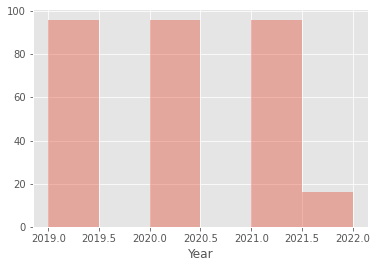

In [255]:
sns.distplot(df3['Year'],kde=False)
